In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Prise des données

In [2]:
ns = 24     #n electrodes en surface
ne = 8     #n electrodes enterrées
zm = [-8, -8, -8, -8, -8, -8, -8, -8]    #profondeur electrodes enterrées
spxs = 1.5  #distance interelectrode surface
spxe = 3    #distance interelectrode enterrées

In [3]:
a1 = 45 #dernière électrode de surface placée avant l'effondrement
a2 = 45 #première électrode de surface placée après l'effondrement

In [4]:
xse = [5,7, 9, 11, 13, 15, 17,19] #première électrode de surface à l'W de l'électrode enterrée
xsesim = []
for i in range(len(xse)) :
    xsesim.append(xse[i]+1)
xsetot = xsesim+xse
xsetot.sort()
xsetot

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

## Réseau d'électrodes

### Réseau en surface

In [5]:
xs = np.arange(0, ns*spxs, spxs)
ys = np.zeros_like(xs)
zs = np.zeros_like(xs)
dfs = pd.DataFrame.from_dict({'X' : xs , 'Y' : ys , 'Z' :zs})
pd.set_option("max_rows", 5)
dfs

,X,Y,Z
0,0.0,0.0,0.0
1,1.5,0.0,0.0
...,...,...,...
22,33.0,0.0,0.0
23,34.5,0.0,0.0


### Réseau enterré

In [6]:
xe = []
for i in range (len(xse)) :
    xe.append(spxs*(xse[i]-1)+spxs/2)
xe

[6.75, 9.75, 12.75, 15.75, 18.75, 21.75, 24.75, 27.75]

In [7]:
ye = zm
ze = np.zeros_like(xe)
dfe = pd.DataFrame.from_dict({'X' : xe , 'Y' : ye , 'Z' :ze})
pd.set_option('display.max_rows', 6)
pd.reset_option('display.max_rows')
dfe

,X,Y,Z
0,6.75,-8,0.0
1,9.75,-8,0.0
2,12.75,-8,0.0
3,15.75,-8,0.0
4,18.75,-8,0.0
5,21.75,-8,0.0
6,24.75,-8,0.0
7,27.75,-8,0.0


### Réseau d'électrode global

In [8]:
dfse=dfs.append(dfe,ignore_index=True)
dfse

,X,Y,Z
0,0.00,0.0,0.0
1,1.50,0.0,0.0
2,3.00,0.0,0.0
3,4.50,0.0,0.0
4,6.00,0.0,0.0
5,7.50,0.0,0.0
6,9.00,0.0,0.0
7,10.50,0.0,0.0
8,12.00,0.0,0.0
9,13.50,0.0,0.0


In [9]:
dfse1 = dfse.drop('Z', 'columns')

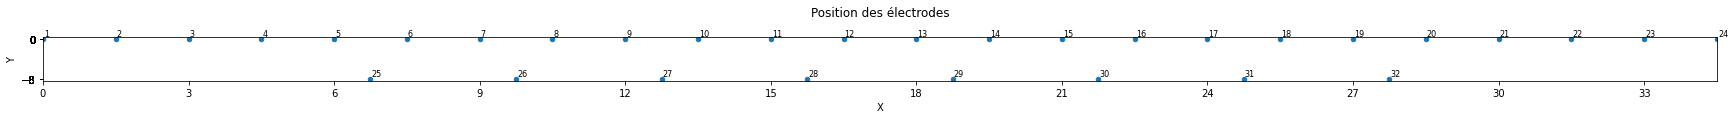

In [10]:
fig, ax = plt.subplots()
dfse.plot.scatter(x='X', y='Y', title='Position des électrodes\n', grid=False, yticks=dfse['Y'], xticks=dfs['X']*2, figsize=(30,0.8), ax=ax,
                  xlim=(dfs.at[0, 'X'], dfs.at[len(dfs)-1, 'X']))
for k, v in dfse1.iterrows():
   ax.annotate(k+1, v, xytext=(1,3), textcoords='offset points', fontsize=8)
plt.show()

## Séquences de mesures (quadripôle)

### Une électrode enterrée

#### AMnB sim impair

In [16]:
seq=[]

i=0
k=0
for k, v in zip(xse, range(ns+1, ns+ne+1)) :
    for i in range(0, min(k-1,ns-k)) :
        for j in range(0,2) :
            A = k-1-i+j
            B = k+1+i+j
            M = k+j
            N = v
            if a1<B<a2 or a1<A<a2 or B>ns:
                pass
            else :
                seq.append([A,B,M,N])
df_seqtest4sim=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest4sim

,A,B,M,N
0,4,6,5,25
1,5,7,6,25
2,3,7,5,25
3,4,8,6,25
4,2,8,5,25
...,...,...,...,...
111,16,22,19,32
112,17,23,20,32
113,15,23,19,32
114,16,24,20,32


In [17]:
with open('aa4sim.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa4sim.dat', sep=' ', mode='a', index=False)

with open('aa4sim.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest4sim)}\n')
    file.write('# ')
    
df_seqtest4sim.to_csv('aa4sim.dat', sep=' ', mode='a', index=False)

In [14]:
# seq=[]
# cd=['df_LE97', 'df_LE98', 'df_LE99', 'df_LE100', 'df_LE101', 'df_LE102']

# for w, k, v in zip(range(len(cd)), xse, range(ns+1, ns+ne+1)) :
#     seq=[]
#     for i in range(0, min(k-1,ns-k)) :
#         for j in range(0,2) :
#             A = k-1-i+j
#             B = k+1+i+j
#             M = k+j
#             N = v
#         # if a1<B<a2 or a1<A<a2 or B>ns or :
#         #     pass
#         # else :
#             seq.append([A,B,M,N])
#     cd[w]=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
# cd[2]

In [15]:
# #### AMnB

# seq=[]

# i=0
# k=0
# for k, v in zip(xse, range(ns+1, ns+ne+1)) :
#     for i in range(0, min(k-1,ns-k)) :
#         A = k-1-i
#         B = k+1+i
#         M = k
#         N = v
#         if a1<B<a2 or a1<A<a2 :
#             pass
#         else :
#             seq.append([A,B,M,N])

# df_seqtest4=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
# with open('seqtest4.dat', mode='a') as file : 
#     file.write(f'{len(df_seqtest4)}\n')
#     file.write('# ')
    
# df_seqtest4.to_csv('seqtest4.dat', sep=' ', mode='a', index=False)

# # df_seq1.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
# # df_seq1 #une électrode enterrée

# df1=pd.DataFrame()
# df1['A-B'] = df_seqtest4[['A', 'B']].astype(str).agg('-'.join, axis=1)
# df1['M-N'] = df_seqtest4[['M', 'N']].astype(str).agg('-'.join, axis=1)

# df1.plot.scatter('M-N', 'A-B', ylim=(df1.at[0, 'A-B'], df1.at[len(df1)-1, 'A-B']), figsize=(10,30))

#### Réciprocité

In [16]:
seq=[]

for i in range(0, 33) :
        A = 32-i
        B = 34+i
        M = 33
        N = 97
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])
        A = 33
        B = 97
        M = 32-i
        N = 34+i
        if a1<M<a2 or a1<N<a2 :
            pass
        else :
            seq.append([A,B,M,N])    

In [17]:
df_seqtestsim=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
with open('seqtestsim.dat', mode='a') as file : 
    file.write(f'{len(df_seqtestsim)}\n')
    file.write('# ')
    
df_seqtestsim.to_csv('seqtestsim.dat', sep=' ', mode='a', index=False)

#### AbMN (bof)

In [20]:
seq=[]

i=0
k=0
for k, v in zip(xse, range(ns+1, ns+ne+1)) :
    for w in range(0, 6) :
        for i in range(k-30, k+30) :
            A = k
            B = v
            M = i
            N = i+1+2*w
            if a1<M<a2 or a1<N<a2 or M==k or N==k or N>k+31 or N>ns or (N>k and M<k) or M<1 or N>24 :
                pass
            else :
                seq.append([A,B,M,N])
df_seqtest6=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest6

,A,B,M,N
0,5,25,1,2
1,5,25,2,3
2,5,25,3,4
3,5,25,6,7
4,5,25,7,8
...,...,...,...,...
573,19,32,3,14
574,19,32,4,15
575,19,32,5,16
576,19,32,6,17


In [21]:
with open('aa6.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa6.dat', sep=' ', mode='a', index=False)

with open('aa6.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest6)}\n')
    file.write('# ')
    
df_seqtest6.to_csv('aa6.dat', sep=' ', mode='a', index=False)

In [20]:
# df_seq1.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
# df_seq1 #une électrode enterrée

In [21]:
df2=pd.DataFrame()
df2['A-B'] = df_seqtest6[['A', 'B']].astype(str).agg('-'.join, axis=1)
df2['M-N'] = df_seqtest6[['M', 'N']].astype(str).agg('-'.join, axis=1)

In [22]:
#df2.plot.scatter('A-B', 'M-N', ylim=(df2.at[0, 'M-N'], df2.at[len(df2)-1, 'M-N']), figsize=(10,70))

### Deux électrodes enterrées

#### AbMn +++

In [22]:
#2 mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1-j
            B = v
            M = xse[k+1+i] +j
            N = v+1+i
            if a1<A<a2 or a1<M<a2 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest92mob=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest92mob

,A,B,M,N
0,6,25,7,26
1,5,25,8,26
2,4,25,9,26
3,3,25,10,26
4,2,25,11,26
...,...,...,...,...
163,17,31,20,32
164,16,31,21,32
165,15,31,22,32
166,14,31,23,32


In [23]:
#1 mobile g
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1-j
            B = v
            M = xse[k+1+i]
            N = v+1+i
            if a1<A<a2 or a1<M<a2 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest91mobg=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest91mobg

,A,B,M,N
0,6,25,7,26
1,5,25,7,26
2,4,25,7,26
3,3,25,7,26
4,2,25,7,26
...,...,...,...,...
163,17,31,19,32
164,16,31,19,32
165,15,31,19,32
166,14,31,19,32


In [24]:
#1 mobile d
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 6) :
            A = xse[k]+1
            B = v
            M = xse[k+1+i] +j
            N = v+1+i
            if a1<A<a2 or a1<M<a2 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest91mobd=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest91mobd

,A,B,M,N
0,6,25,7,26
1,6,25,8,26
2,6,25,9,26
3,6,25,10,26
4,6,25,11,26
...,...,...,...,...
163,18,31,20,32
164,18,31,21,32
165,18,31,22,32
166,18,31,23,32


In [25]:
df_9total=df_seqtest92mob.append(df_seqtest91mobg, ignore_index=True)
df_9total=df_9total.append(df_seqtest91mobd, ignore_index=True)
df_9total.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_9total

,A,B,M,N
0,6,25,7,26
1,5,25,8,26
2,4,25,9,26
3,3,25,10,26
4,2,25,11,26
...,...,...,...,...
443,18,31,20,32
444,18,31,21,32
445,18,31,22,32
446,18,31,23,32


In [26]:
with open('aa9.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa9.dat', sep=' ', mode='a', index=False)

with open('aa9.dat', mode='a') as file : 
    file.write(f'{len(df_9total)}\n')
    file.write('# ')
    
df_9total.to_csv('aa9.dat', sep=' ', mode='a', index=False)

In [27]:
df9=pd.DataFrame()
df9['A-B'] = df_9total[['A', 'B']].astype(str).agg('-'.join, axis=1)
df9['M-N'] = df_9total[['M', 'N']].astype(str).agg('-'.join, axis=1)

In [28]:
#df9.plot.scatter('M-N', 'A-B', ylim=(df9.at[0, 'A-B'], df9.at[len(df9)-1, 'A-B']), figsize=(20,15))

In [30]:
seq=[]

for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k],ns-xse[k+1]+1)) :
        A = xse[k]-i+1
        M = xse[k+1]+i
        B = v
        N = v+1
        if a1<M<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])

for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k],ns-xse[k+1]+1)) :
        A = xse[k]-i+1
        M = xse[k+1]
        B = v
        N = v+1
        if a1<M<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])
            
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k],ns-xse[k+1]+1)) :
        A = xse[k]+1
        M = xse[k+1]+i
        B = v
        N = v+1
        if a1<M<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])
            
df_9total2=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_9total2.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_9total2

,A,B,M,N
0,6,25,7,26
1,5,25,8,26
2,4,25,9,26
3,3,25,10,26
4,2,25,11,26
...,...,...,...,...
149,18,31,20,32
150,18,31,21,32
151,18,31,22,32
152,18,31,23,32


In [31]:
with open('aa92.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa92.dat', sep=' ', mode='a', index=False)

with open('aa92.dat', mode='a') as file : 
    file.write(f'{len(df_9total2)}\n')
    file.write('# ')
    
df_9total2.to_csv('aa92.dat', sep=' ', mode='a', index=False)

#### AnMb

In [43]:
#2 mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 11) :
            A = xse[k]-j+1
            N = v
            M = xse[k+1+i] +j
            B = v+1+i
            if a1<A<a2 or a1<M<a2 or A<1 or M>24:
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest82mob=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest82mob

,A,B,M,N
0,6,26,7,25
1,5,26,8,25
2,4,26,9,25
3,3,26,10,25
4,2,26,11,25
...,...,...,...,...
206,17,32,20,31
207,16,32,21,31
208,15,32,22,31
209,14,32,23,31


In [44]:
#1 mobile g
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 11) :
            A = xse[k]-j+1
            N = v
            M = xse[k+1+i]
            B = v+1+i
            if a1<A<a2 or a1<M<a2 or A<1 or M>24 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest81mobg=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest81mobg

,A,B,M,N
0,6,26,7,25
1,5,26,7,25
2,4,26,7,25
3,3,26,7,25
4,2,26,7,25
...,...,...,...,...
245,12,32,19,31
246,11,32,19,31
247,10,32,19,31
248,9,32,19,31


In [45]:
#1 mobile d
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, 11) :
            A = xse[k]+1
            N = v
            M = xse[k+1+i] +j
            B = v+1+i
            if a1<A<a2 or a1<M<a2 or A<1 or M>24 :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
df_seqtest81mobd=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest81mobd

,A,B,M,N
0,6,26,7,25
1,6,26,8,25
2,6,26,9,25
3,6,26,10,25
4,6,26,11,25
...,...,...,...,...
245,18,32,20,31
246,18,32,21,31
247,18,32,22,31
248,18,32,23,31


In [46]:
df_8total=df_seqtest82mob.append(df_seqtest81mobg, ignore_index=True)
df_8total=df_8total.append(df_seqtest81mobd, ignore_index=True)
df_8total.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_8total

,A,B,M,N
0,6,26,7,25
1,5,26,8,25
2,4,26,9,25
3,3,26,10,25
4,2,26,11,25
...,...,...,...,...
650,18,32,20,31
651,18,32,21,31
652,18,32,22,31
653,18,32,23,31


In [47]:
with open('aa8.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa8.dat', sep=' ', mode='a', index=False)

with open('aa8.dat', mode='a') as file : 
    file.write(f'{len(df_8total)}\n')
    file.write('# ')
    
df_8total.to_csv('aa8.dat', sep=' ', mode='a', index=False)

#### AmnB

In [34]:
seq=[]

for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        A = xse[k]-i+1
        B = xse[k+1]+i
        M = v
        N = v+1
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])

for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        A = xse[k]-i+1
        B = xse[k+1]
        M = v
        N = v+1
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])
            
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    for i in range(0, min(xse[k]+1,ns-xse[k+1]+1)) :
        A = xse[k]+1
        B = xse[k+1]+i
        M = v
        N = v+1
        if a1<B<a2 or a1<A<a2 :
            pass
        else :
            seq.append([A,B,M,N])
            
df_seqtest13=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest13.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_seqtest13

,A,B,M,N
0,6,7,25,26
1,5,8,25,26
2,4,9,25,26
3,3,10,25,26
4,2,11,25,26
...,...,...,...,...
161,18,20,31,32
162,18,21,31,32
163,18,22,31,32
164,18,23,31,32


In [35]:
with open('aa13.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa13.dat', sep=' ', mode='a', index=False)

with open('aa13.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest13)}\n')
    file.write('# ')
    
df_seqtest13.to_csv('aa13.dat', sep=' ', mode='a', index=False)

In [39]:
df13=pd.DataFrame()
df13['A-B'] = df_seqtest13[['A', 'B']].astype(str).agg('-'.join, axis=1)
df13['M-N'] = df_seqtest13[['M', 'N']].astype(str).agg('-'.join, axis=1)

<AxesSubplot:xlabel='A-B', ylabel='M-N'>

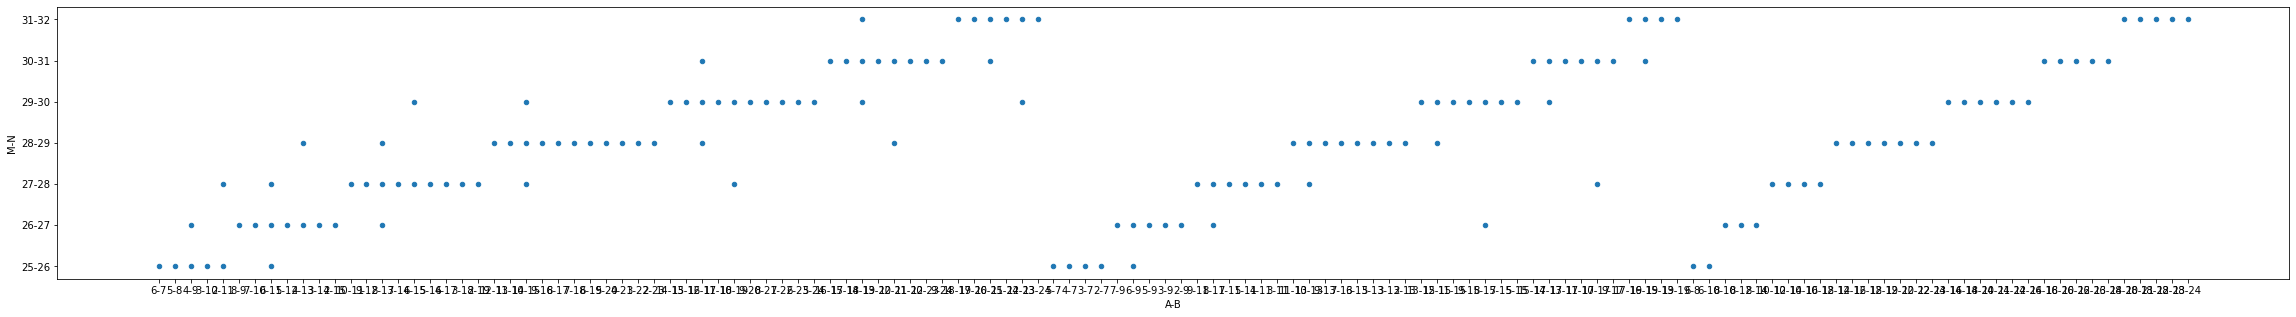

In [40]:
df13.plot.scatter('A-B', 'M-N', figsize=(40,5))
                 #ylim=(df12.at[0, 'A-B'], df12.at[len(df12)-1, 'A-B']))

In [41]:
#2 mobiles
seq=[]
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, min(xse[k],ns-xse[k+1]+1)) :
            A = xse[k]-j+1
            M = v
            B = xse[k+1+i] +j
            N = v+1+i
            if a1<A<a2 or a1<B<a2 or N>ns+ne :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1
        
#1 mobile g
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, min(xse[k],ns-xse[k+1]+1)) :
            A = xse[k]-j+1
            M = v
            B = xse[k+1+i]
            n = v+1+i
            if a1<A<a2 or a1<B<a2 or N>ns+ne :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1

#1 mobile d
a=ne
for k, v in zip(range(len(xse[:-1])), range(ns+1, ns+ne)) :
    i=0
    a -=1
    while i < a :
        for j in range(0, min(xse[k],ns-xse[k+1]+1)) :
            A = xse[k]+1
            M = v
            B = xse[k+1+i] +j
            N = v+1+i
            if a1<A<a2 or a1<B<a2 or N>ns+ne :
                pass
            else :
                seq.append([A,B,M,N])
        i += 1


df_seqtest13_1=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest13_1.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_seqtest13_1

,A,B,M,N
0,6,7,25,26
1,5,8,25,26
2,4,9,25,26
3,3,10,25,26
4,2,11,25,26
...,...,...,...,...
614,18,20,31,32
615,18,21,31,32
616,18,22,31,32
617,18,23,31,32


In [42]:
with open('aa132.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa132.dat', sep=' ', mode='a', index=False)

with open('aa132.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest13_1)}\n')
    file.write('# ')
    
df_seqtest13_1.to_csv('aa132.dat', sep=' ', mode='a', index=False)

### Trois électrodes enterrées

#### aNmb

In [36]:
seq = []
for k in (range(ns+1, ns+ne-1)) :
    for i in range(1, ns+1) :
        A = k
        B = k+2 
        M = k+1
        N = i
        if a1<N<a2 :
                pass
        else :
            seq.append([A,B,M,N])
df_seqtest15=pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seqtest15 #3 électrodes enterrées

,A,B,M,N
0,25,27,26,1
1,25,27,26,2
2,25,27,26,3
3,25,27,26,4
4,25,27,26,5
...,...,...,...,...
139,30,32,31,20
140,30,32,31,21
141,30,32,31,22
142,30,32,31,23


In [37]:
with open('aa15.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa15.dat', sep=' ', mode='a', index=False)

with open('aa15.dat', mode='a') as file : 
    file.write(f'{len(df_seqtest15)}\n')
    file.write('# ')
    
df_seqtest15.to_csv('aa15.dat', sep=' ', mode='a', index=False)

In [38]:
df15=pd.DataFrame()
df15['A-B'] = df_seqtest15[['A', 'B']].astype(str).agg('-'.join, axis=1)
df15['M-N'] = df_seqtest15[['M', 'N']].astype(str).agg('-'.join, axis=1)
df15 = df15.sort_values(by=['A-B', 'M-N'])

In [39]:
# df15.plot.scatter('A-B','M-N', figsize=(10,80))
#                  #, xlim=(df2.at[0, 'M-N'], df2.at[len(df2)-1, 'M-N']))

### Quatre électrodes enterrées

In [52]:
seq=[]
maxSep = ne - 2

#wenner alpha
for sep in range(1, maxSep + 1):
            for i in range(1+ns,(ne - 2) - sep+1+ns):
                a = i
                m = a + sep
                n = m + sep
                b = n + sep
                if b > ne+ns :
                    pass
                else :
                    seq.append([a,b,m,n])
                    
#wenner beta
for sep in range(1, maxSep + 1):
    for i in range(1+ns,(ne - 2) - sep+1+ns):
        a = i
        b = a + sep
        m = b + sep
        n = m + sep
        if n > ne+ns :
            pass
        else :
            seq.append([a,b,m,n])


# schlumberger
for sep in range(1, maxSep + 1):
    for i in range(1+ns,(ne - 2) - sep+1+ns):
        a = i
        m = a + sep
        n = m + 1
        b = n + sep
        if b > ne+ns :
            pass
        else :
            seq.append([a,b,m,n])  
            
# dipole dipole
for space in range(0, ne-2) :
    for i in range(ns+1, ns+ne-2) :
        a = i
        b = a+1
        m = b+1+space
        n = m+1
        if n > ne+ns :
            pass
        else :
            seq.append([a,b,m,n])
df_seq4_enterres = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
df_seq4_enterres.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
df_seq4_enterres #4 électrodes enterrées

,A,B,M,N
0,25,28,26,27
1,26,29,27,28
2,27,30,28,29
3,28,31,29,30
4,29,32,30,31
5,25,31,27,29
6,26,32,28,30
7,25,26,27,28
8,26,27,28,29
9,27,28,29,30


In [53]:
with open('aa4enterres.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aa4enterres.dat', sep=' ', mode='a', index=False)

with open('aa4enterres.dat', mode='a') as file : 
    file.write(f'{len(df_seq4_enterres)}\n')
    file.write('# ')
    
df_seq4_enterres.to_csv('aa4enterres.dat', sep=' ', mode='a', index=False)

<AxesSubplot:xlabel='M-N', ylabel='A-B'>

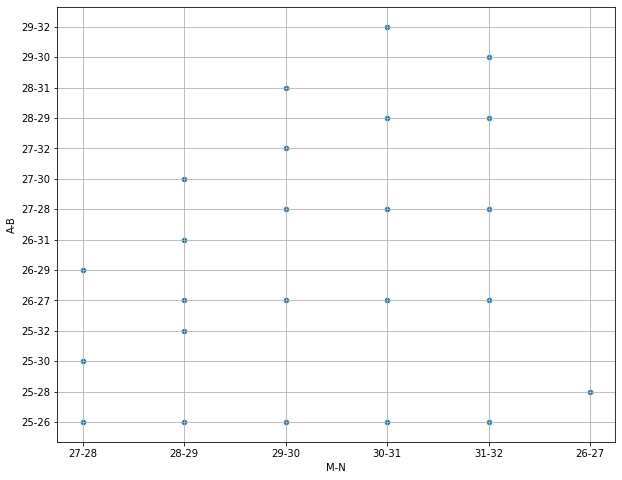

In [42]:
df4_enterres=pd.DataFrame()
df4_enterres['A-B'] = df_seq4_enterres[['A', 'B']].astype(str).agg('-'.join, axis=1)
df4_enterres['M-N'] = df_seq4_enterres[['M', 'N']].astype(str).agg('-'.join, axis=1)
df4_enterres = df4_enterres.sort_values(by=['A-B', 'M-N'])
df4_enterres.plot.scatter('M-N','A-B', grid=True, figsize=(10,8))
                 #, xlim=(df2.at[0, 'M-N'], df2.at[len(df2)-1, 'M-N']))

## Gradient + dipole-dipole

In [49]:
# gradient
seq=[]
ab_sep_base = 12  # number of channels + 2   avant : 9
ev = 2
takeevery = 2
max_fak = int(np.ceil(ns / ab_sep_base))
ab_space = [ii*ab_sep_base for ii in range(max_fak) if ii % ev == 1]
mn_space = [ii for ii in range(max_fak) if ii % takeevery == 1]
for ab in range(len(ab_space)):  # ab spacings
    for aa in np.arange(1, ns-ab_space[ab]+1, 1):  # a index
        mn = mn_space[ab]
        for mm in np.arange(aa+mn, aa+ab_space[ab]-mn, mn):
            a=int(aa)
            b=int(aa+ab_space[ab])
            m=int(mm)
            n=int(mm+mn)
            seq.append([a,b,m,n])
grad = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
grad

,A,B,M,N
0,1,13,2,3
1,1,13,3,4
2,1,13,4,5
3,1,13,5,6
4,1,13,6,7
...,...,...,...,...
1915,12,96,54,61
1916,12,96,61,68
1917,12,96,68,75
1918,12,96,75,82


In [50]:
with open('aagradsurf.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aagradsurf.dat', sep=' ', mode='a', index=False)

with open('aagradsurf.dat', mode='a') as file : 
    file.write(f'{len(grad)}\n')
    file.write('# ')
    
grad.to_csv('aagradsurf.dat', sep=' ', mode='a', index=False)

In [51]:
# dipole dipole
seq=[]
for space in range(0, ns-2) :
    for i in range(1, ns-2) :
        a = i
        b = a+1
        m = b+1+space
        n = m+1
        if n > ns :
            pass
        else :
            seq.append([a,b,m,n])
dip_dip = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
dip_dip

,A,B,M,N
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7
4,5,6,7,8
...,...,...,...,...
4366,2,3,94,95
4367,3,4,95,96
4368,1,2,94,95
4369,2,3,95,96


In [52]:
with open('aadip_dipsurf.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aadip_dipsurf.dat', sep=' ', mode='a', index=False)

with open('aadip_dipsurf.dat', mode='a') as file : 
    file.write(f'{len(dip_dip)}\n')
    file.write('# ')
    
dip_dip.to_csv('aadip_dipsurf.dat', sep=' ', mode='a', index=False)

In [53]:
# import pygimli as pg
# from pygimli.physics import ert
# from pygimli.physics.ert import createERTData
# for i in (range(len(schemes[:-1]))) :
#     survey.add(ert.createData(elecs=pg.utils.grange(start=ns+1, end=ns+ne, dx=1), schemeName=schemes[i]))
# survey = pg.DataContainerERT(ert.createData(elecs=pg.utils.grange(start=ns+1, end=ns+ne, dx=1), schemeName='dd'))
# #survey.add(ert.createData(elecs=pg.utils.grange(start=ns+1, end=ns+ne, dx=1), schemeName='dd'))
# survey.save('4_electrodes_enterrees.txt')
# survey

In [54]:
# import itertools
# inp_list = np.arange(ns+1, ns+ne+1, 1)
# permutations = list(itertools.permutations(inp_list, r=4))

In [48]:
# dipole dipole
seq=[]
for space in range(1, ns-2) :
    for i in range(1, ns-2) :
        for j in range (1,8) :
            a = i
            b = a+j
            m = b+j*space
            n = m+j
            if n > ns :
                pass
            else :
                seq.append([a,b,m,n])
dip_dip = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
dip_dip

,A,B,M,N
0,1,2,3,4
1,1,3,5,7
2,1,4,7,10
3,1,5,9,13
4,1,6,11,16
...,...,...,...,...
407,2,3,22,23
408,3,4,23,24
409,1,2,22,23
410,2,3,23,24


In [49]:
with open('aadip_dipsurf.dat', mode='w+') as file : 
    file.write(f'{len(dfse)}\n')
    file.write('# ')

dfse.to_csv('aadip_dipsurf.dat', sep=' ', mode='a', index=False)

with open('aadip_dipsurf.dat', mode='a') as file : 
    file.write(f'{len(dip_dip)}\n')
    file.write('# ')
    
dip_dip.to_csv('aadip_dipsurf.dat', sep=' ', mode='a', index=False)

In [50]:
#shlm
seq=[]
for sep in range(1, ns - 1):
    for i in range(1, ns-1):
        for j in range (1,4) :
            a = i
            m = a + j*sep
            n = m + j
            b = n + j*sep
            if b > ns :
                pass
            else :
                seq.append([a,b,m,n])
shl = pd.DataFrame(seq, columns=['A', 'B', 'M', 'N'])
shl.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
shl

,A,B,M,N
0,1,4,2,3
1,1,7,3,5
2,1,10,4,7
3,2,5,3,4
4,2,8,4,6
...,...,...,...,...
193,5,24,14,15
194,1,22,11,12
195,2,23,12,13
196,3,24,13,14


In [51]:
with open('aashl.dat', mode='w+') as file : 
    file.write(f'{len(dfs)}\n')
    file.write('# ')

dfs.to_csv('aashl.dat', sep=' ', mode='a', index=False)

with open('aashl.dat', mode='a') as file : 
    file.write(f'{len(shl)}\n')
    file.write('# ')
    
shl.to_csv('aashl.dat', sep=' ', mode='a', index=False)

## Ecriture du fichier des séquences

In [55]:
# df_total=df_seq1.append(df_seq2, ignore_index=True)
# df_total=df_total.append(df_seq3, ignore_index=True)
# df_total=df_total.append(df_seq4, ignore_index=True)
# df_total

In [56]:
# with open('seq.dat', mode='a') as file : 
#     file.write(f'{len(df_total)}\n')
#     file.write('# ')
    
# df_total.to_csv('seq.dat', sep=' ', mode='a', index=False)